# Leaf Classifier
The objective of this project is to classify the damaged leaves dataset into two categories: healthy and damaged. There are three methods developed for this project, which are image masking, contour detection, and image masking followed by contour detection to refine false negative results from the first method. We will assess the classifier accuracy from each method we developed.

## Importing the function files and necessary libraries

In [3]:
from final_main import *
import cv2
from matplotlib import pyplot as plt
import os
import random

In [ ]:
# Function to show the image
def randomized_img(path, num_images=10):
    files = [i for i in os.listdir(path) if i.lower().endswith(('png', 'jpg', 'jpeg'))]
    selected = random.sample(files, min(num_images, len(files)))
    return [os.path.join(path, file) for file in selected]

def display_images_grid(image_paths, grid_size=(2, 5)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 6))
    axes = axes.flatten()
    
    for ax, img_path in zip(axes, image_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        ax.imshow(img)
        ax.set_title(os.path.basename(img_path))
        ax.axis('off')
    
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

## First method: image masking
We develop a function called `pathList` to compile a list of files from a directory path. From `final_main.py` file, we use `segmentation` function by passing the leaf images. Although the input images are already segmented, we can still find halos around the foregrounds, so we think it is necessary to segment the images further to isolate the foreground.

The segmented image will be processed by a function called `colorDetection`, which masks the segmented images based on a defined color range in HSV color space. We try to isolate yellow and brown colors that are associated with the damage we are looking for.

In [10]:
folder_path = pathList("original")
segmented_list = segmentation(folder_path)

In [14]:
segmented = pathList("segmented")
dictionaries_1 = colorDetection(segmented)

The result of classification is stored in two different folders. The following image is a preview of the leaves classified as damaged.

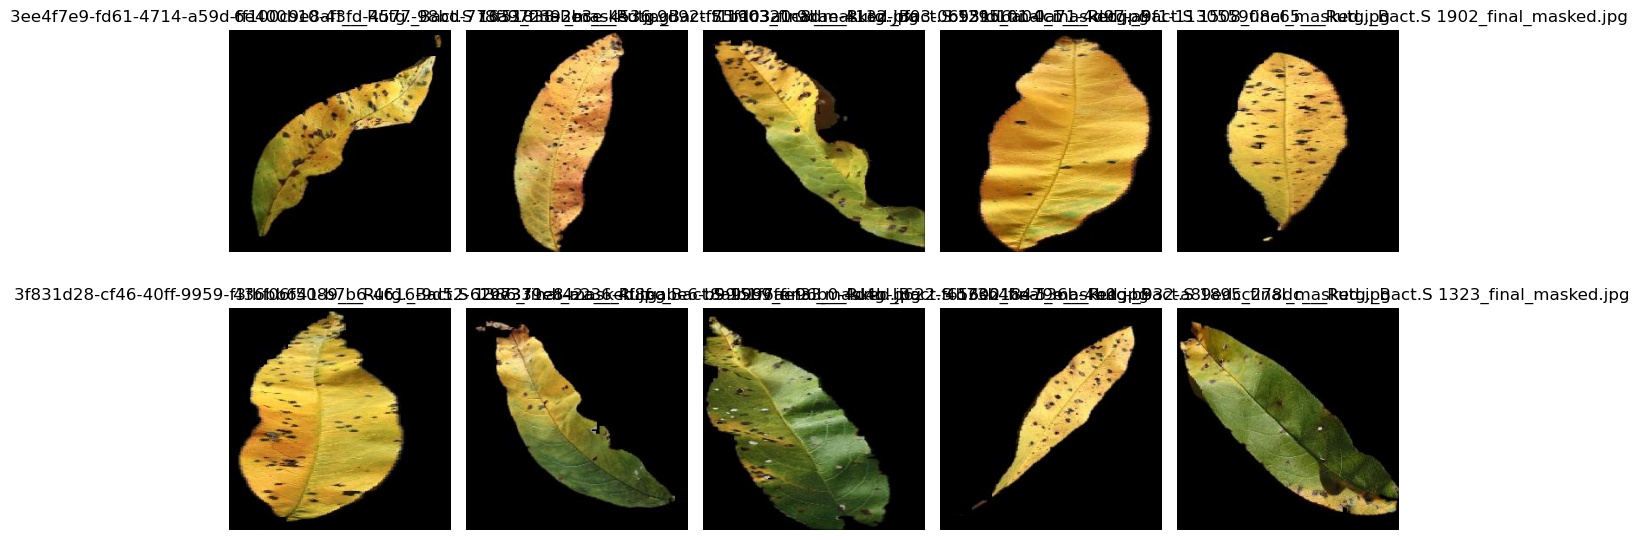

In [15]:
damaged_masked_preview = randomized_img("detected_damaged_leaves_color")
display_images_grid(damaged_masked_preview)

The following image is a preview of the leaves classified as healthy.

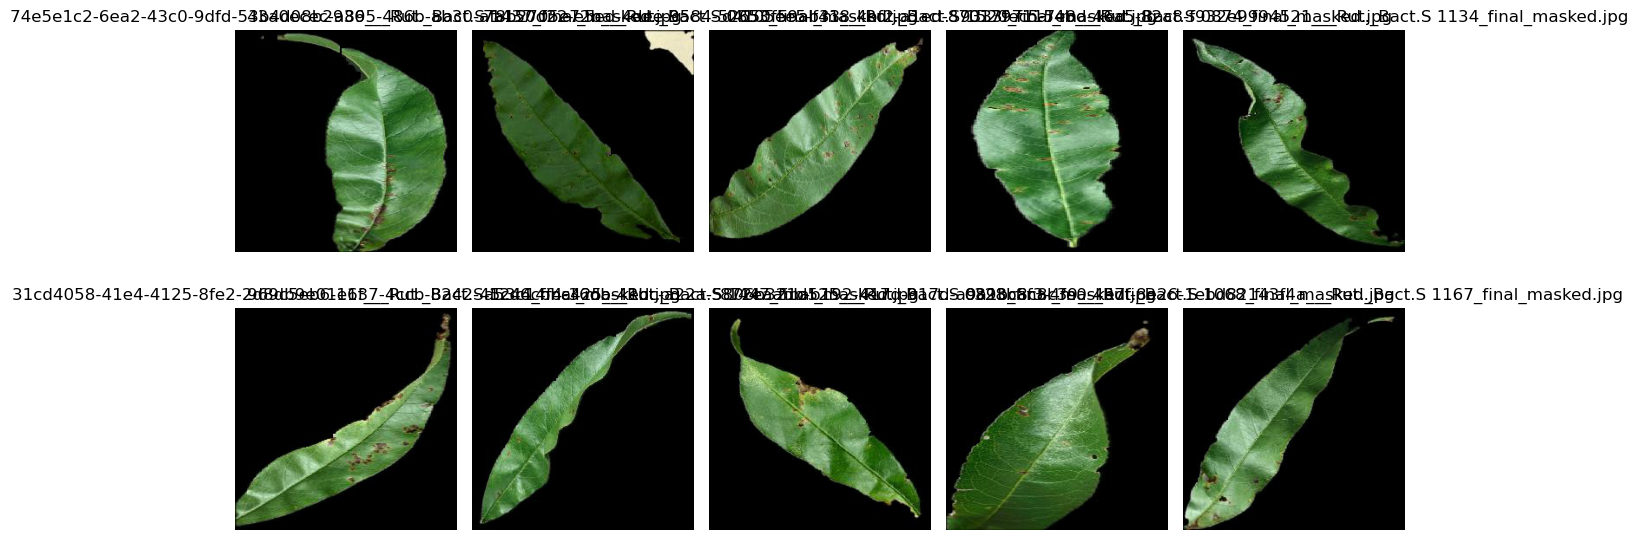

In [16]:
healthy_masked_preview = randomized_img("detected_healthy_leaves_color")
display_images_grid(healthy_masked_preview)

Now we evaluate the accuracy of the classifier.

In [17]:
damaged_colorDetection = {key: value for key, value in dictionaries_1.items() if value == 'The leaf is damaged'}
colorDetection_accuracy = len(damaged_colorDetection)/len(dictionaries_1)
print(colorDetection_accuracy)

0.5624727905964301


## Second method: contour detection
In the second method, we implement Otsu's thresholding to isolate the spots on the leaves. After we get the binarized image, we implement image morphology to suppress particular shapes that are not the damage. Then, we use `cv2.contourArea` to count every closed shape on the image that represents the damage. 

In [18]:
dictionaries_2 = findContour(segmented)

The result of classification is stored in two different folders. The following image is a preview of the leaves classified as damaged.

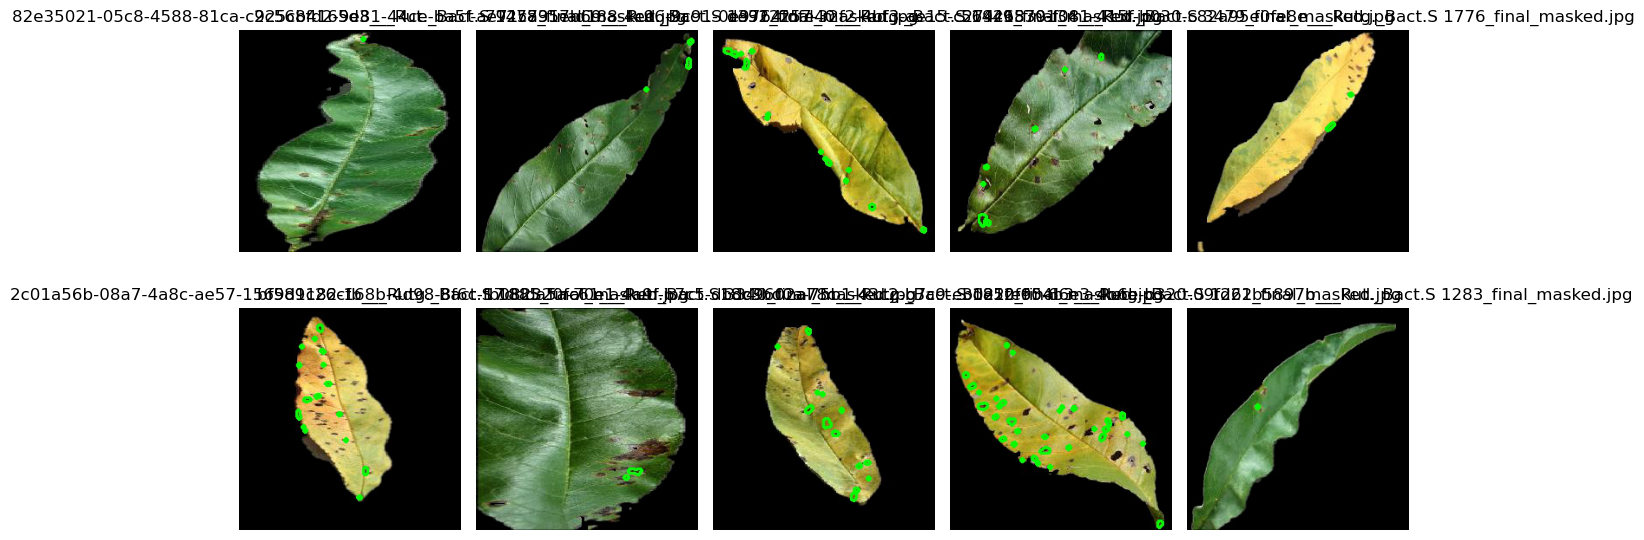

In [19]:
damaged_contour_preview = randomized_img("detected_damaged_leaves_contour")
display_images_grid(damaged_contour_preview)

The following image is a preview of the leaves classified as healthy.

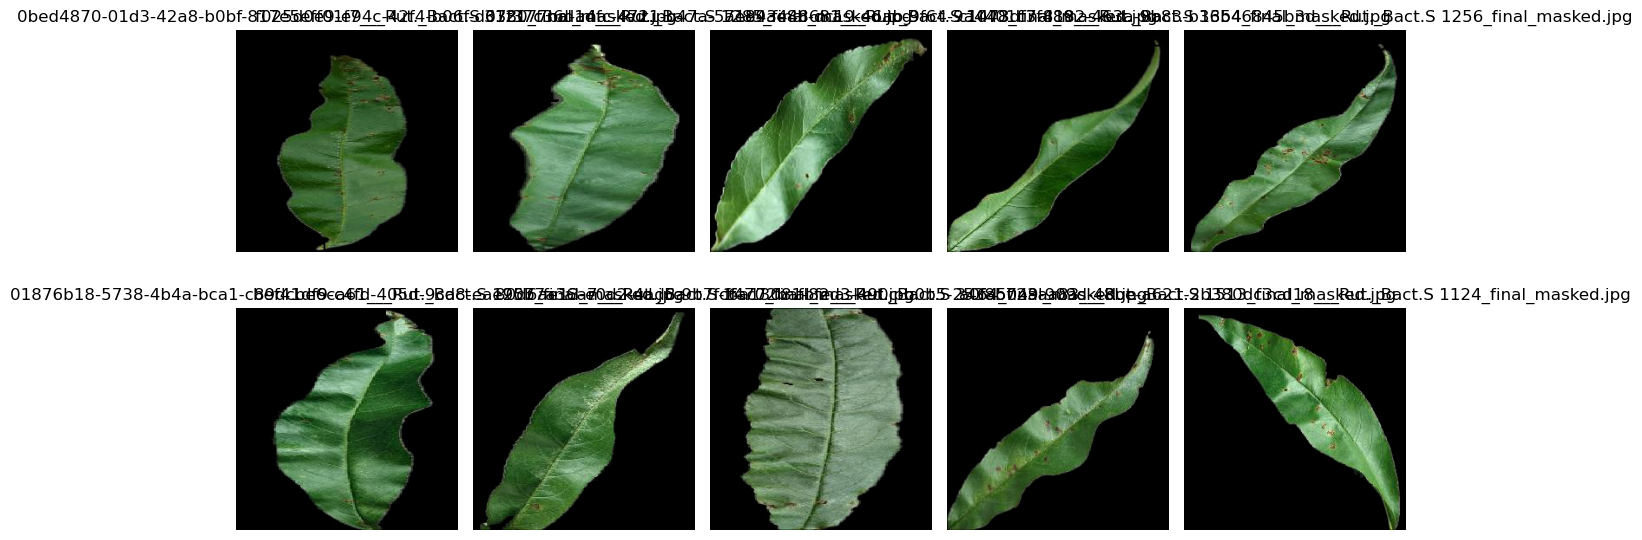

In [20]:
healthy_contour_preview = randomized_img("detected_healthy_leaves_contour")
display_images_grid(healthy_contour_preview)

Now we evaluate the accuracy of the classifier.

In [21]:
damaged_findContour = {key: value for key, value in dictionaries_2.items() if value == 'The leaf is damaged'}
findContour_accuracy = len(damaged_findContour)/len(dictionaries_2)
print(findContour_accuracy)

0.8737483674357858


## Third method: image masking followed by contour detection
Now, we try to refine the false negative results from image masking by passing the images detected as healthy to contour detection.

In [22]:
false_negative = pathList("detected_healthy_leaves_color")
dictionaries_3 = findContour(false_negative)

In [23]:
damaged_findContour_2 = {key: value for key, value in dictionaries_3.items() if value == 'The leaf is damaged'}
combined_accuracy = (len(damaged_findContour_2) + len(damaged_colorDetection))/len(dictionaries_2)
print(combined_accuracy)

0.8754897692642577
